In [50]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

data = load_svmlight_file("batch.dat") #charger la base de données dans le format svmlight / libsvm en une matrice creuse
#Le premier élément de chaque ligne va étre utlisé comme cible pour y faire de la classification .
x=data[0].todense() #retourne une représention dense de la matrice
y=data[1] #la variable cible à prédire est la classe à laquelle un élement appartient


In [3]:
type(data)

tuple

In [4]:
type(x) #x est un tableau numpy

numpy.matrixlib.defmatrix.matrix

In [5]:
np.shape(x) #1244 observations et 129 attributs

(1244, 129)

In [6]:
np.shape(y) 

(1244,)

In [39]:
data

(<1244x129 sparse matrix of type '<class 'numpy.float64'>'
 	with 160476 stored elements in Compressed Sparse Row format>,
 array([1., 1., 1., ..., 5., 5., 5.]))

In [8]:
type(y)

numpy.ndarray

In [9]:
x[0] #affiche la première classe

matrix([[ 1.00000000e+01,  2.17495635e+04,  2.62748800e+00,
          3.50752400e+00,  4.11089900e+00,  5.01569700e+00,
         -3.47473800e+00, -4.56969300e+00, -1.34484910e+01,
          2.11380440e+04,  2.71328100e+00,  3.61221300e+00,
          4.28157000e+00,  5.02698600e+00, -3.25212700e+00,
         -3.99553000e+00, -1.15995780e+01,  2.60182490e+03,
          2.08574800e+00,  7.23314000e-01,  1.16123700e+00,
          1.58737600e+00, -5.16412000e-01, -8.24780000e-01,
         -1.11288200e+00,  2.60268650e+03,  2.07497700e+00,
          7.23795000e-01,  1.21627300e+00,  2.59486600e+00,
         -5.20201000e-01, -8.55015000e-01, -2.79124300e+00,
          1.21854970e+03,  2.09254400e+00,  3.95898000e-01,
          8.63491000e-01,  1.14535800e+00, -2.52613000e-01,
         -4.08573000e-01, -1.15076800e+00,  1.40778760e+03,
          2.10446300e+00,  4.46390000e-01,  9.12604000e-01,
          1.21873600e+00, -2.92121000e-01, -4.84320000e-01,
         -1.30983900e+00,  3.32170900e+0

# Considèrons maintenant qu'on ne connait pas la classe pour chaque observation

In [11]:
#mesures statistiques
stats.describe(x, axis=None) #on met axis à None pour calculer les statistoques sur la totalité de la matrice sans prendre en compte les classes

DescribeResult(nobs=160476, minmax=(-12826.543, 316646.0625), mean=4676.709337064957, variance=552122996.7785624, skewness=7.904085291870655, kurtosis=71.4678053910924)

Les valeurs sont distibuées loins de leur moyenne (variance très grande)
En total, et sans prendre en compte les différentes classes, il y a 160476 individus (valeurs)

In [12]:
type(stats.describe(x, axis=None))

scipy.stats.stats.DescribeResult

In [13]:
stats.describe(y, axis=None)

DescribeResult(nobs=1244, minmax=(1.0, 6.0), mean=3.422829581993569, variance=2.4534124214572666, skewness=-0.23213972614475584, kurtosis=-1.5891191879204132)

En totale il y a 6 classes

In [ ]:
#visualisation des mesures statistiques

{'whiskers': [<matplotlib.lines.Line2D at 0x1250f66a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1250d7b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1250f6978>],
 'medians': [<matplotlib.lines.Line2D at 0x126731a90>],
 'fliers': [],
 'means': []}

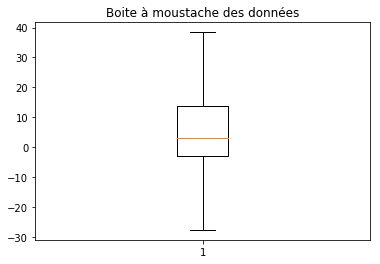

In [87]:
fig4, ax4 = plt.subplots()
ax4.set_title('Boite à moustache des données')
ax4.boxplot(A, showfliers=False)

In [91]:
#normalisation des données
from sklearn.preprocessing import StandardScaler

In [94]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
scaled_data=scaler.transform(x)

In [ ]:
#Réduction de dimension

In [95]:
from sklearn.decomposition import PCA

In [108]:
acp=PCA(n_components=4)
acp.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [109]:
print(acp.explained_variance_ratio_)

[0.42199588 0.23057832 0.08285719 0.06440313]


In [110]:
print(acp.singular_values_) 

[260.23107078 192.3597851  115.31083929 101.66197441]


In [116]:
x_acp=acp.fit_transform(scaled_data)

In [194]:

blues = y == 1


Text(0, 0.5, '2em coposante (23.05%)')

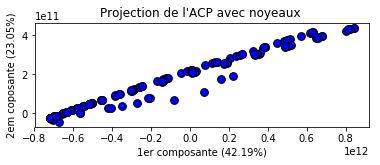

In [195]:
plt.subplot(1, 1, 1, aspect='equal')

plt.scatter(x_acp[blues, 0], x_acp[blues, 1], c="blue",
            s=60, edgecolor='k')
plt.title("Projection de l'ACP avec noyeaux ")
plt.xlabel("1er composante (42.19%)")
plt.ylabel("2em coposante (23.05%)")
#bonne

In [196]:
#Essayer l'acp avec noyaux, au cas où les données ne sont pas linéairement séparables
from sklearn.decomposition import KernelPCA

In [197]:

kacp = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=1)
x_kacp = kpca.fit_transform(x)

Text(0, 0.5, '2em coposante ')

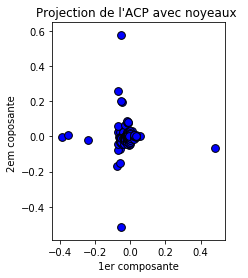

In [199]:
plt.subplot(1, 1, 1, aspect='equal')

plt.scatter(x_kacp[blues, 0], x_kacp[blues, 1], c="blue",
            s=60, edgecolor='k')
plt.title("Projection de l'ACP avec noyeaux ")
plt.xlabel("1er composante")
plt.ylabel("2em coposante ")
#mal

In [200]:
poly_acp = KernelPCA(kernel="poly",degree=2, gamma=10)
x_poly_acp = poly_acp.fit_transform(x)

Text(0, 0.5, '2em coposante ')

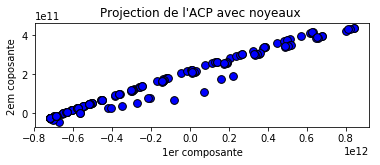

In [201]:
plt.subplot(1, 1, 1, aspect='equal')

plt.scatter(x_poly_acp[blues, 0], x_poly_acp[blues, 1], c="blue",
            s=60, edgecolor='k')
plt.title("Projection de l'ACP avec noyeaux ")
plt.xlabel("1er composante")
plt.ylabel("2em coposante ")
#séparation linéaire

In [202]:
poly_acp1 = KernelPCA(kernel="poly",degree=3, gamma=10)
x_poly_acp1 = poly_acp1.fit_transform(x)

Text(0, 0.5, '2em coposante ')

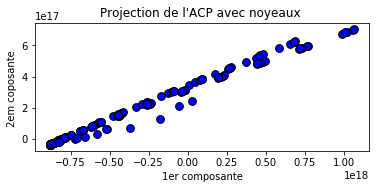

In [203]:
plt.subplot(1, 1, 1, aspect='equal')

plt.scatter(x_poly_acp1[blues, 0], x_poly_acp1[blues, 1], c="blue",
            s=60, edgecolor='k')
plt.title("Projection de l'ACP avec noyeaux ")
plt.xlabel("1er composante")
plt.ylabel("2em coposante ")
#séparation linéaire

In [ ]:
#Classification non-supervisée

In [205]:
#classification avec la méthode de K-means
from sklearn.cluster import KMeans

Text(0.5, 1.0, '4 classes')

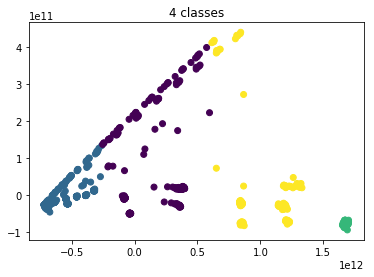

In [234]:
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(x_acp)

plt.subplot(111)
plt.scatter(x_acp[:, 0], x_acp[:, 1], c=y_pred)
plt.title("4 classes")

In [220]:
y_kmeans=kmeans.predict(x_acp)


Text(0.5, 1.0, '6 classes')

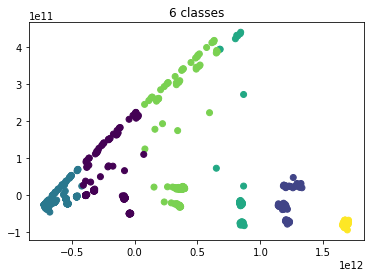

In [233]:
y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(x_acp)

plt.subplot(111)
plt.scatter(x_acp[:, 0], x_acp[:, 1], c=y_pred)
plt.title("6 classes")

Text(0.5, 1.0, '3 classes')

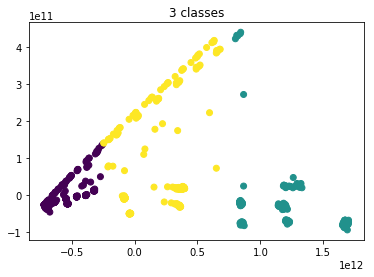

In [230]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(x_acp)

plt.subplot(111)
plt.scatter(x_acp[:, 0], x_acp[:, 1], c=y_pred)
plt.title("3 classes")

Text(0.5, 1.0, '2 classes')

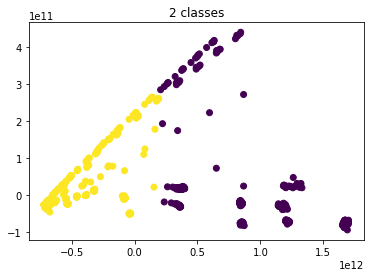

In [228]:
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(x_acp)

plt.subplot(111)
plt.scatter(x_acp[:, 0], x_acp[:, 1], c=y_pred)
plt.title("2 classes")

Optimisation de k?

En général, il y a pas un moyen de tester la performance d'une classification non-supervisée. Cependant, on peut optimiser le choix de k, le nombre de classes pour la méthode de k-means: on parle de x-means. La méthode fonctionne de la manière suivante: Par rapport à un certain critère heuristique, on choisit, disant la moitié des centres de classes pour une classification. On divise chacun de ces centres pour créer de nouveaux centres de classes. Si cette opération améliore la performance du modèle, on garde les et on itère jusqu'à convergence, sinon, on choisit d'autre ensemble de centres de classes.

Pour mesurer la performance de chaque modèle, on utilise la métrique BIC dont l'expression est la suivante:

$$BIC(D | M) = L(M | D) - (p / 2)  log N$$

$$D$$ la base de données 
$$M$$ le modèle pour chaque choix de k
$$L(M | D)$$ la fonction de vraisemblance dépendante du modèle M étant donné une base D

Nous avons installé la librairie pyclustering qui contient cette méthode implémentée.

In [257]:
A = np.asarray(x_acp).reshape(-1,1) #convertir la matrice x en une liste de 1-D
A

array([[-7.00725409e+11],
       [-1.83239569e+10],
       [-2.46069030e+10],
       ...,
       [ 6.79463843e+02],
       [-2.13162165e+02],
       [ 1.46260483e+02]])

KeyboardInterrupt: 

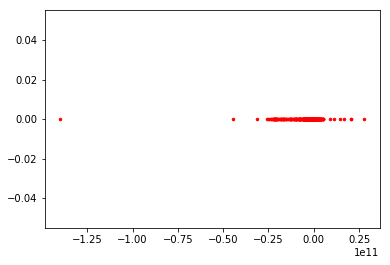

In [258]:
#trop long: nous avons laissé l'éxecution pour 40 minutes sans avoir de résultats
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer


# Préparer les centres initiaux - le nombre de centres initiaux définissent le nombre de classes par lesquelles
# on commence l'analyse

nombre_centres_initiaux = 2
centres_initiaux = kmeans_plusplus_initializer(A, nombre_centres_initiaux).initialize()
# création d'une instance de l'algorithme de x-means. l'algorithme va commencer l'analyse avec 2 classes, le nombre maximal
# de classe est 10
xmeans_instance = xmeans(A, centres_initiaux, 10) 
xmeans_instance.process()
# Extract clustering results: clusters and their centers
classes = xmeans_instance.get_clusters()
centres = xmeans_instance.get_centers()
visualizer = cluster_visualizer()
visualizer.append_clusters(classes, A)
visualizer.append_cluster(centres, None, marker='*')
visualizer.show()

In [325]:
#Clustering par la méthode AgglomerativeClustering

In [326]:
from sklearn.cluster import AgglomerativeClustering

In [327]:
clustering = AgglomerativeClustering(n_clusters=5).fit_predict(x_acp)
clustering 

array([2, 2, 2, ..., 1, 1, 1])

In [328]:
#visualisation avec la méthode AgglomerativeClustering

Text(0.5, 1.0, '5 classes')

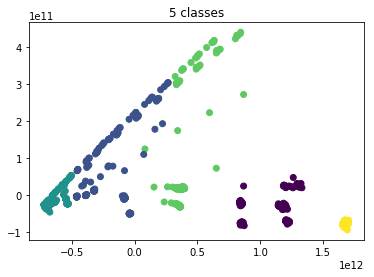

In [329]:
plt.subplot(111)
plt.scatter(x_acp[:, 0], x_acp[:, 1], c=clustering)
plt.title("5 classes")

On préfère utiliser les k-means puisque sa compléxité est plus petite en temps d'exécution

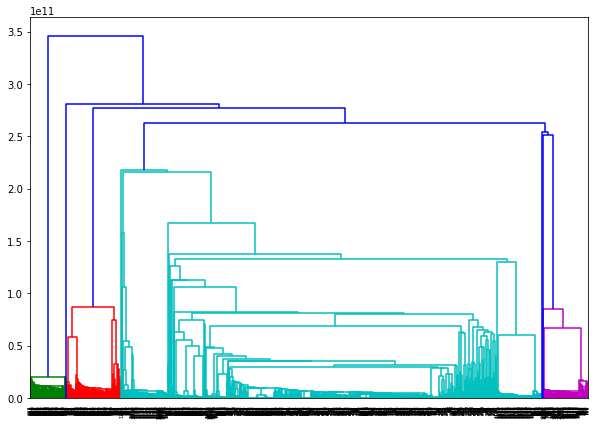

In [252]:
#dendogramme
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(x_acp, 'single')

#labelList = range(1, 7200)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

On peut considérer des classes pour la classification mais c'est déjà fait avec l'algorithme des K-means.

# Considèrons maintenant qu'on connait la classe pour chaque observation

Il s'agit d'apprentissage supervisé

In [262]:
#séparation de la base de données en base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

In [263]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [264]:
#classification avac support vector machine
from sklearn.svm import SVC

In [266]:
clf_svc=SVC(gamma='auto') #kernel rbf par défaut
clf_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [267]:
#mesurer la performance de cette classification
clf_svc.score(X_test, y_test)

0.40160642570281124

In [ ]:
#Mauvaise

In [270]:
clf_svc=SVC(gamma='auto',kernel='linear')
clf_svc.fit(X_train,y_train)
clf_svc.score(X_test, y_test)

0.9879518072289156

In [271]:
#très bonne modèle: résultat attendu car les données sont linéaire d'après la visualisation de l'ACP

In [272]:
#classification par arbre de décision
from sklearn.tree import DecisionTreeClassifier

In [279]:
clf_decision_tree = DecisionTreeClassifier(random_state=42)
clf_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [282]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_decision_tree, X_test, y_test, cv=10) #appliquer la cross validation pour arriver à la combinaison 
#optimale des hyperparamètres du modèle

array([0.92592593, 0.92307692, 0.96153846, 1.        , 0.92      ,
       1.        , 0.95833333, 1.        , 0.83333333, 0.95652174])

In [283]:
#bon précision

In [288]:
#classification avec les forets aléatoires
from sklearn.ensemble import RandomForestClassifier
clf_foret_alea=RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=42)
clf_foret_alea.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [291]:
clf_foret_alea.score(X_test, y_test) 

0.7710843373493976

In [292]:
cross_val_score(clf_foret_alea, X_test, y_test, cv=10) #améliorer la performance du modèle par la cross_validation

array([0.85185185, 0.80769231, 0.84615385, 0.76923077, 0.88      ,
       0.95833333, 0.79166667, 0.875     , 0.58333333, 0.82608696])

In [293]:
#bon modèle si on choisit les bons hyperparamètres

In [309]:
#Classification avec la régression logistique
from sklearn.linear_model import LogisticRegression 
clf_lin_reg=LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial', max_iter=1000).fit(X_train, y_train)

In [311]:
cross_val_score(clf_lin_reg, X_test, y_test, cv=10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.91666667, 0.95652174])

In [ ]:
#On remarque qu'il y a des modèles parfaits: score 1, donc soit il y avait du sur-apprentissage où bien il y avait une fuite
#de données de test lors de l'apprentissage!

# Notre modèle final qui performe le mieux est le SVC (support vector classifier) avec une précision de 98.79%